In [12]:
import tensorflow 

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [18]:
#loading the data
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [20]:
train_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#separating features and label

X = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values

C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\3091999650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=train_data.iloc[:,0], palette="icefire")


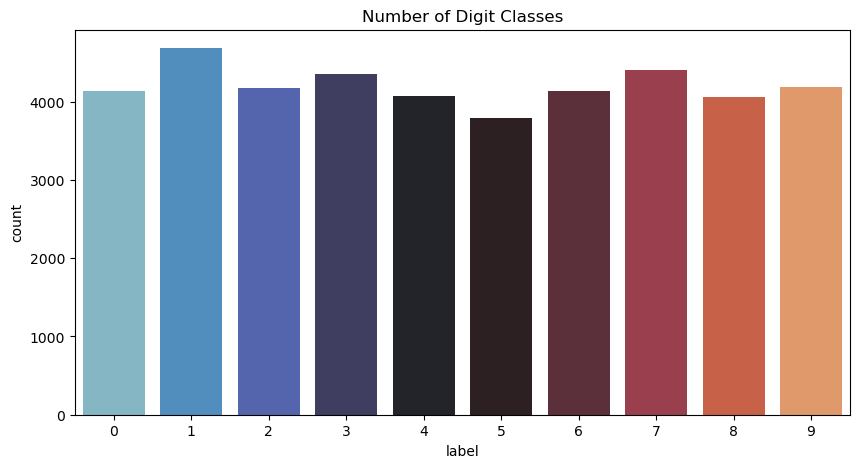

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [44]:

plt.figure(figsize=(10, 5))
a = sns.countplot(x=train_data.iloc[:,0], palette="icefire")
plt.title("Number of Digit Classes")
plt.show()
train_data.iloc[:,0].value_counts()

In [46]:
# normalizing the data
X = X/ 255.0
test_data = test_data / 255.0

In [48]:
#reshaping data for cnn
#Reshaping data to 28x28x1 makes it compatible with CNN input requirements.
X = X.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1, 28, 28, 1)


### to_categorical: 
This function is used to one-hot encode the labels (targets) in Y. One-hot encoding is a common technique used in classification tasks, especially when working with neural networks.
### Y: 
It represents the target labels (class labels) for each sample. Before encoding, these labels might be integers (e.g., 0 to 9 for a 10-class classification problem).
### num_classes=10: 
Specifies that there are 10 possible classes. Each class label will be converted into a vector of length 10, where the position corresponding to the class will have a value of 1, and the rest will be 0.

In [51]:
#One hot Encoding on lables

y = to_categorical(y, num_classes=10)

In [53]:
X_train, X_val, y_train, y_val= train_test_split(X,y, test_size=3, random_state=42)

###### Data augmentation 
enhances the model's robustness by generating random transformations of the training images.
###### ImageDataGenerator 
This is a class from Keras used for data augmentation, which artificially increases the size of the training dataset by applying random transformations to the images during training. This helps improve the generalization of the model and prevents overfitting.
###### rotation_range=10
Randomly rotates the images by a maximum of 10 degrees.
###### width_shift_range=0.1
Randomly shifts the images horizontally by up to 10% of the image width.
###### height_shift_range=0.1
Randomly shifts the images vertically by up to 10% of the image height.
###### zoom_range=0.1
Randomly zooms in on the images by up to 10%.

In [55]:
#Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [61]:
model = Sequential()

In [101]:
# First Convolutional Layer
model.add(Conv2D(filters=8, kernel_size=(5, 5), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduces size from (28, 28) to (14, 14)
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduces size from (14, 14) to (7, 7)
model.add(Dropout(0.25))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation="softmax"))


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=["accuracy"])

In [109]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_val,  y_val),
    steps_per_epoch = len(X_train)// 64
)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5583 - loss: 1.2885 - val_accuracy: 1.0000 - val_loss: 0.0660
Epoch 2/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8125 - loss: 0.6021 - val_accuracy: 1.0000 - val_loss: 0.0729
Epoch 3/20


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


656/656 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8701 - loss: 0.4154 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 4/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.9219 - loss: 0.3504 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 5/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9030 - loss: 0.3129 - val_accuracy: 1.0000 - val_loss: 0.0226
Epoch 6/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.9062 - loss: 0.2687 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 7/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.9197 - loss: 0.2683 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 8/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - accuracy: 0.9375 - loss: 0.2665 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 9/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.9277 - loss: 0.2440 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 10/20
656/656 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.9062 - loss: 0.2141 - val_accura

In [111]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
val_loss, val_accuracy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 7.1876e-04


(0.0007187617593444884, 1.0)

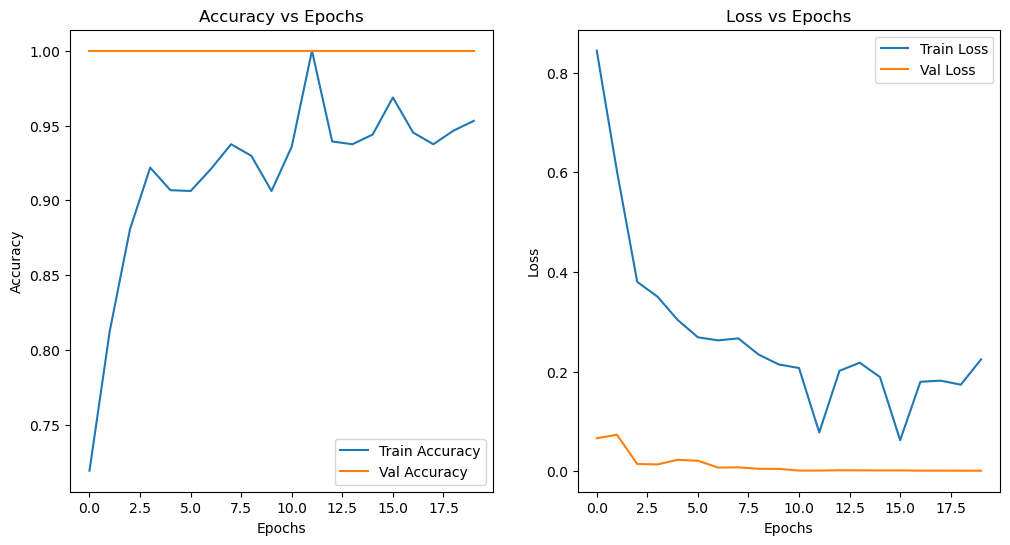

In [121]:
# Plotting the accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [113]:
#prediction on Test Data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [119]:
#Submission file
submission = pd.DataFrame({
    "ImageId" : np.arange(1, len(predicted_classes)+1),
    "Label" : predicted_classes
})
submission.to_csv("Submission.csv", index=False)

print("File is created")

File is created
